# Titanic prediction

**Importing librairies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import gradio as gr

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.dropna(axis=0, inplace=True)
df = df[["survived", "sex", "age", "fare", "class", "adult_male", "alone"]]
y = df['survived']
X = df.drop('survived', axis=1)

**Replacing all values into numerical**

In [12]:
X['sex'].replace(['male', 'female'], [0, 1], inplace=True)
X['class'].replace(['First', 'Second', 'Third'], [0, 1, 2], inplace=True)
X['adult_male'].replace([False, True], [0, 1], inplace=True)
X['alone'].replace([False, True], [0, 1], inplace=True)

In [13]:
df.describe()

,survived,age,fare
count,182.000000,182.000000,182.000000
mean,0.675824,35.623187,78.919735
std,0.469357,15.671615,76.490774
min,0.000000,0.920000,0.000000
25%,0.000000,24.000000,29.700000
50%,1.000000,36.000000,57.000000
75%,1.000000,47.750000,90.000000
max,1.000000,80.000000,512.329200


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    182 non-null    int64   
 1   sex         182 non-null    object  
 2   age         182 non-null    float64 
 3   fare        182 non-null    float64 
 4   class       182 non-null    category
 5   adult_male  182 non-null    bool    
 6   alone       182 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(1), object(1)
memory usage: 7.8+ KB


In [15]:
df.nunique()

survived       2
sex            2
age           63
fare          93
class          3
adult_male     2
alone          2
dtype: int64

**Splitting dataset**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print("data frameis: ",df.shape)
print('train set is: ', X_train.shape)
print('test set is: ', X_test.shape)

data frameis:  (182, 7)
train set is:  (127, 6)
test set is:  (55, 6)


In [18]:
df.head()

,survived,sex,age,fare,class,adult_male,alone
1,1,female,38.0,71.2833,0,False,False
3,1,female,35.0,53.1000,0,False,False
6,0,male,54.0,51.8625,0,True,True
10,1,female,4.0,16.7000,2,False,False
11,1,female,58.0,26.5500,0,False,True


In [10]:
print(df.shape)

(182, 7)


**Visualizing dataset**

Text(0.5, 1.0, 'Test set')

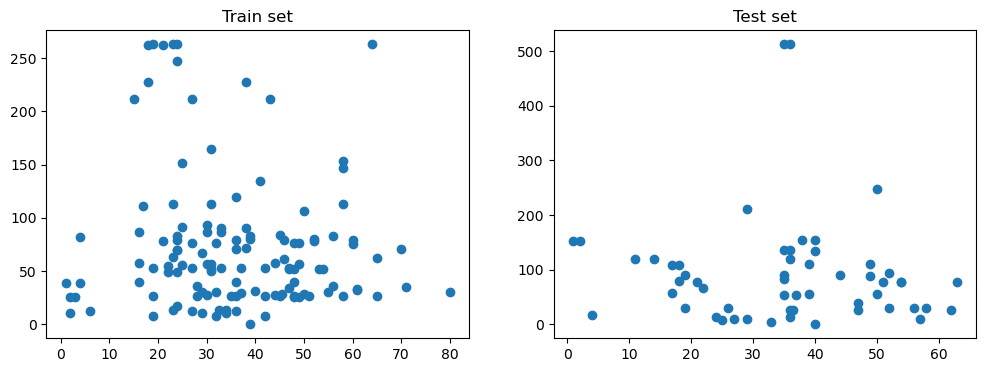

In [19]:
# 
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(x=X_train["age"], y=X_train["fare"])
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test["age"], X_test["fare"])
plt.title('Test set')

<AxesSubplot:xlabel='sex', ylabel='survived'>

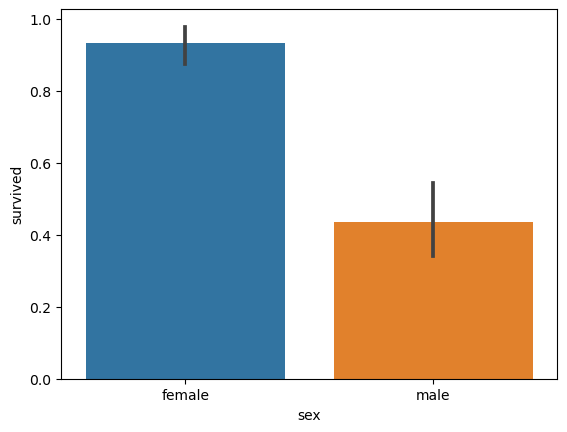

In [20]:
sns.barplot(data=df, x='sex', y='survived')

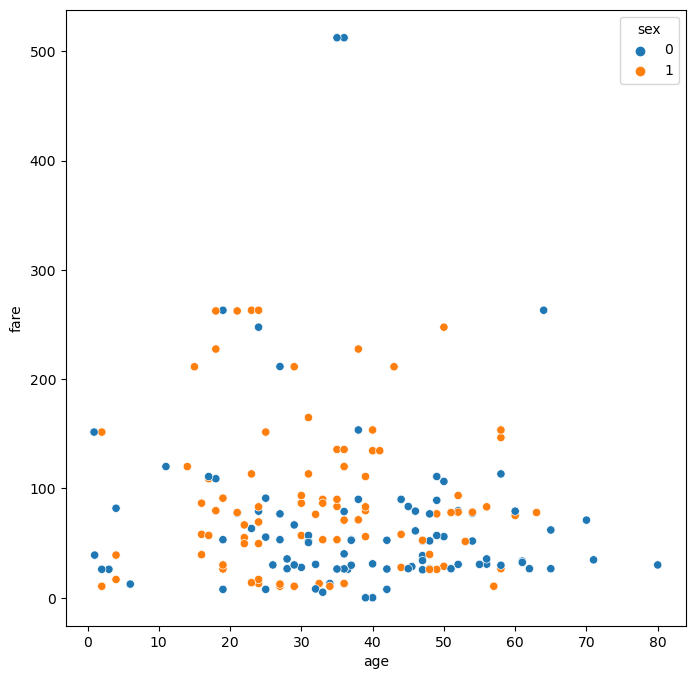

In [21]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X["age"], y=X["fare"], hue=X["sex"])
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


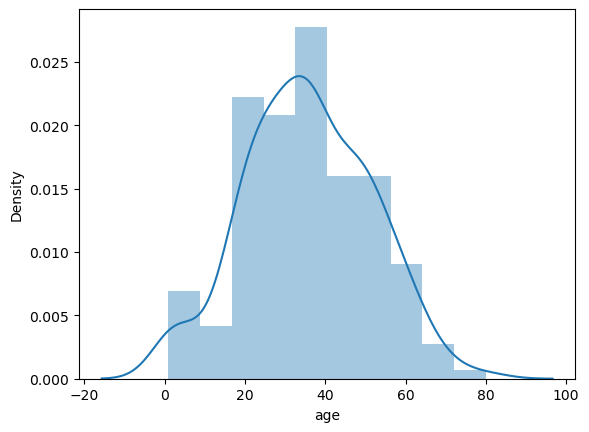

In [22]:
sns.distplot(X['age'], hist=True)
plt.show()

**Using KNeighborsClassifier estimator**

In [28]:
model = KNeighborsClassifier(11)

In [29]:
model.fit(X_train, y_train)
print("train score: ",model.score(X_train, y_train))
print("test score: ",model.score(X_test, y_test))

train score:  0.7165354330708661
test score:  0.6909090909090909


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [30]:
model.predict(X_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
#from sklearn.model_selection import KFold
#cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

0.7086153846153846

In [33]:
# using different values of n_neighbors
k=np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train , y_train, param_name='n_neighbors', param_range=k, cv=5)
val_score.shape

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

(49, 5)

In [34]:
val_score.mean()
val_score.mean(axis=1)

array([0.60738462, 0.49630769, 0.62215385, 0.54276923, 0.64553846,
       0.55846154, 0.69261538, 0.63046154, 0.67723077, 0.66153846,
       0.70861538, 0.70061538, 0.70061538, 0.69261538, 0.69261538,
       0.67723077, 0.70061538, 0.67784615, 0.67753846, 0.66153846,
       0.65384615, 0.65384615, 0.66923077, 0.66153846, 0.68492308,
       0.70030769, 0.70061538, 0.70861538, 0.70092308, 0.70092308,
       0.69292308, 0.70092308, 0.69292308, 0.69292308, 0.69292308,
       0.69292308, 0.69292308, 0.69292308, 0.69292308, 0.69292308,
       0.69292308, 0.69292308, 0.69292308, 0.69292308, 0.69292308,
       0.69292308, 0.69292308, 0.69292308, 0.69292308])

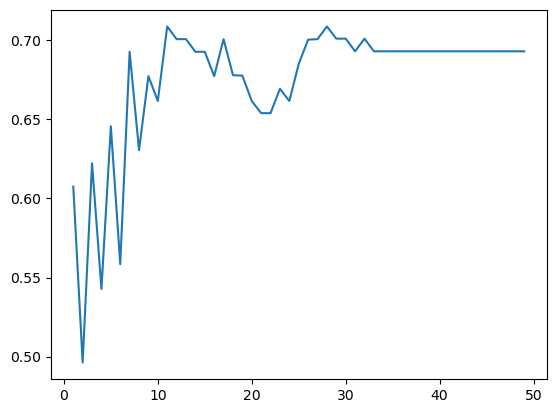

In [35]:
plt.plot(k ,val_score.mean(axis=1))   # best values: k=11/28

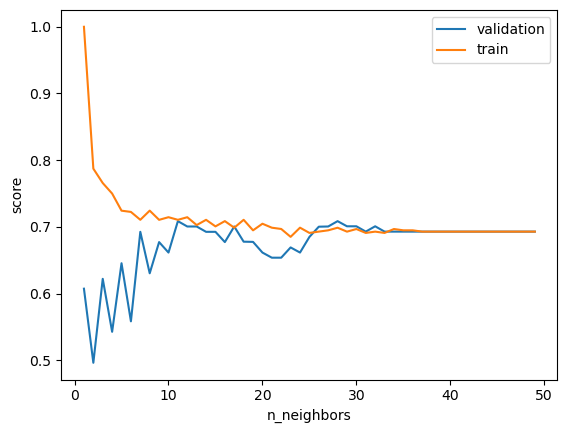

In [36]:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [37]:
param_grid = {'n_neighbors': np.arange(1, 20),
             'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [38]:
grid.best_score_

0.7163076923076923

In [39]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17}

In [40]:
model = grid.best_estimator_

In [41]:
y_pred = model.predict(X_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
model.score(X_test, y_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6545454545454545

**Learning curve**

In [44]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                          train_sizes=np.linspace(0.1, 1.0, 10),
                                          cv=5)

print(N)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 727, in kneighbors
    raise Va

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

[ 10  20  30  40  50  60  70  80  90 101]


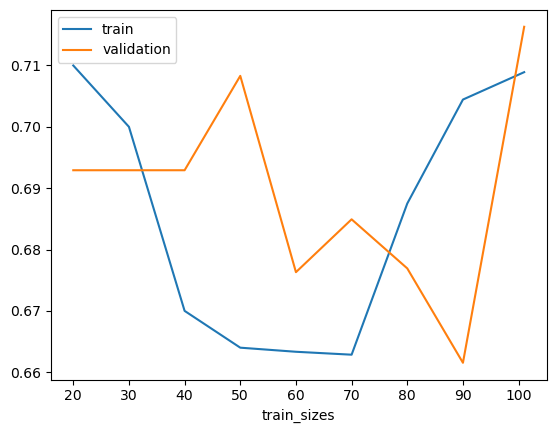

In [45]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

**Error metrics**

In [47]:
print('MAE: ', mean_absolute_error(y_test, y_pred))  
print('MSE: ', mean_squared_error(y_test, y_pred))
l = mean_squared_error(y_test, y_pred)
print('RMSE: ',np.sqrt(l))

MAE:  0.34545454545454546
MSE:  0.34545454545454546
RMSE:  0.5877538136452587


**Using pipeline**

In [49]:
numerical_features = ['age', 'fare', 'class', 'sex', 'adult_male', 'alone']

numerical_transformer = make_pipeline(SimpleImputer(strategy='median'), 
                                      StandardScaler())

preprocessor = make_column_transformer((numerical_transformer, numerical_features))

In [51]:
# using different estimator
model = make_pipeline(preprocessor, LogisticRegression(solver='liblinear'))
model.fit(X_train, y_train)
#model.transform(X_train)

accuracy = model.score(X_test, y_test) * 100
print("Accuracy of the model: {}".format(accuracy))

Accuracy of the model: 76.36363636363637


**Data preprocessing**

In [53]:
from sklearn.impute import MissingIndicator
MissingIndicator().fit_transform(X_train)

array([], shape=(127, 0), dtype=bool)

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,
             strategy='mean')
imputer.fit_transform(X_train)

array([[  0.    ,   6.    ,  12.475 ,   2.    ,   0.    ,   0.    ],
       [  0.    ,  24.    , 247.5208,   0.    ,   1.    ,   0.    ],
       [  1.    ,  30.    ,  56.9292,   0.    ,   0.    ,   1.    ],
       [  1.    ,  24.    ,  69.3   ,   0.    ,   0.    ,   1.    ],
       [  0.    ,  19.    ,   7.65  ,   2.    ,   1.    ,   1.    ],
       [  1.    ,  53.    ,  51.4792,   0.    ,   0.    ,   0.    ],
       [  1.    ,  49.    ,  25.9292,   0.    ,   0.    ,   1.    ],
       [  0.    ,  42.    ,   7.65  ,   2.    ,   1.    ,   1.    ],
       [  0.    ,  28.    ,  35.5   ,   0.    ,   1.    ,   1.    ],
       [  1.    ,  23.    ,  13.7917,   1.    ,   0.    ,   1.    ],
       [  0.    ,  71.    ,  34.6542,   0.    ,   1.    ,   1.    ],
       [  1.    ,  48.    ,  25.9292,   0.    ,   0.    ,   1.    ],
       [  0.    ,  45.    ,  83.475 ,   0.    ,   1.    ,   0.    ],
       [  1.    ,  24.    ,  69.3   ,   0.    ,   0.    ,   1.    ],
       [  0.    ,  30.    ,  27.75

In [36]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X_train)

array([[  0.    ,   6.    ,  12.475 ,   2.    ,   0.    ,   0.    ],
       [  0.    ,  24.    , 247.5208,   0.    ,   1.    ,   0.    ],
       [  1.    ,  30.    ,  56.9292,   0.    ,   0.    ,   1.    ],
       [  1.    ,  24.    ,  69.3   ,   0.    ,   0.    ,   1.    ],
       [  0.    ,  19.    ,   7.65  ,   2.    ,   1.    ,   1.    ],
       [  1.    ,  53.    ,  51.4792,   0.    ,   0.    ,   0.    ],
       [  1.    ,  49.    ,  25.9292,   0.    ,   0.    ,   1.    ],
       [  0.    ,  42.    ,   7.65  ,   2.    ,   1.    ,   1.    ],
       [  0.    ,  28.    ,  35.5   ,   0.    ,   1.    ,   1.    ],
       [  1.    ,  23.    ,  13.7917,   1.    ,   0.    ,   1.    ],
       [  0.    ,  71.    ,  34.6542,   0.    ,   1.    ,   1.    ],
       [  1.    ,  48.    ,  25.9292,   0.    ,   0.    ,   1.    ],
       [  0.    ,  45.    ,  83.475 ,   0.    ,   1.    ,   0.    ],
       [  1.    ,  24.    ,  69.3   ,   0.    ,   0.    ,   1.    ],
       [  0.    ,  30.    ,  27.75

In [55]:
# the fare of each class
print(X_train[X_train["class"]==0]["fare"])   # 40 -> 300
print(X_train[X_train["class"]==1]["fare"])   # 13 -> 39
print(X_train[X_train["class"]==2]["fare"])   # 7.5 -> 15 

118    247.5208
309     56.9292
369     69.3000
571     51.4792
796     25.9292
         ...   
52      76.7292
366     75.2500
707     26.2875
583     40.1250
498    151.5500
Name: fare, Length: 110, dtype: float64
473    13.7917
123    13.0000
340    26.0000
292    12.8750
516    10.5000
618    39.0000
66     10.5000
193    26.0000
21     13.0000
183    39.0000
Name: fare, dtype: float64
751    12.4750
715     7.6500
699     7.6500
429     8.0500
394    16.7000
205    10.4625
823    12.4750
Name: fare, dtype: float64


In [98]:
#from sklearn.linear_model import LinearRegression
import random
def survive(name, sex, age, classe_A_or_B_or_C, alone):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    if sex.upper()=='MALE':
        s=0
    else:
        s=1
        
    if classe_A_or_B_or_C.upper()=="A":
        c=0
    elif classe_A_or_B_or_C.upper()=="B":
        c=1
    else:
        c=2
        
    if alone==True:
        al=1
    else:
        al=0
        
    if age>=18 and s==0:
        adult_male=True
    else:
        adult_male=False
    
    if classe_A_or_B_or_C=="A":
        fare = random.uniform(40, 300)
    elif classe_A_or_B_or_C=="B":
        fare = random.uniform(13, 39)
    else:
        fare = random.uniform(7.5, 15)
        
    X = np.array([s, age, fare, c, adult_male, al]).reshape(1, 6)
    if model.predict(X)==1:
        return name +"! If you were on the boat of the titanic, you would survive."
    else:
        return name+ "! If you were on the boat of the titanic, you would die unfortunately."
    #print(model.predict(X))
    #print(model.predict_proba(X))

In [99]:
print(survive("salwa", "female", 21, "C", True))

salwa! If you were on the boat of the titanic, you would survive.


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [101]:
interface = gr.Interface(fn=survive,
                        inputs=["text", "text", "number", "text", "checkbox"],
                        #inputs=gr.Textbox(placeholder="Put Your Name.."),
                        outputs=["text"])

interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7867
Running on public URL: https://e9eb3671-c5ab-4bc2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
